# 948. Bag of Tokens

### Difficulty: <font color = orange> Medium </font>

---

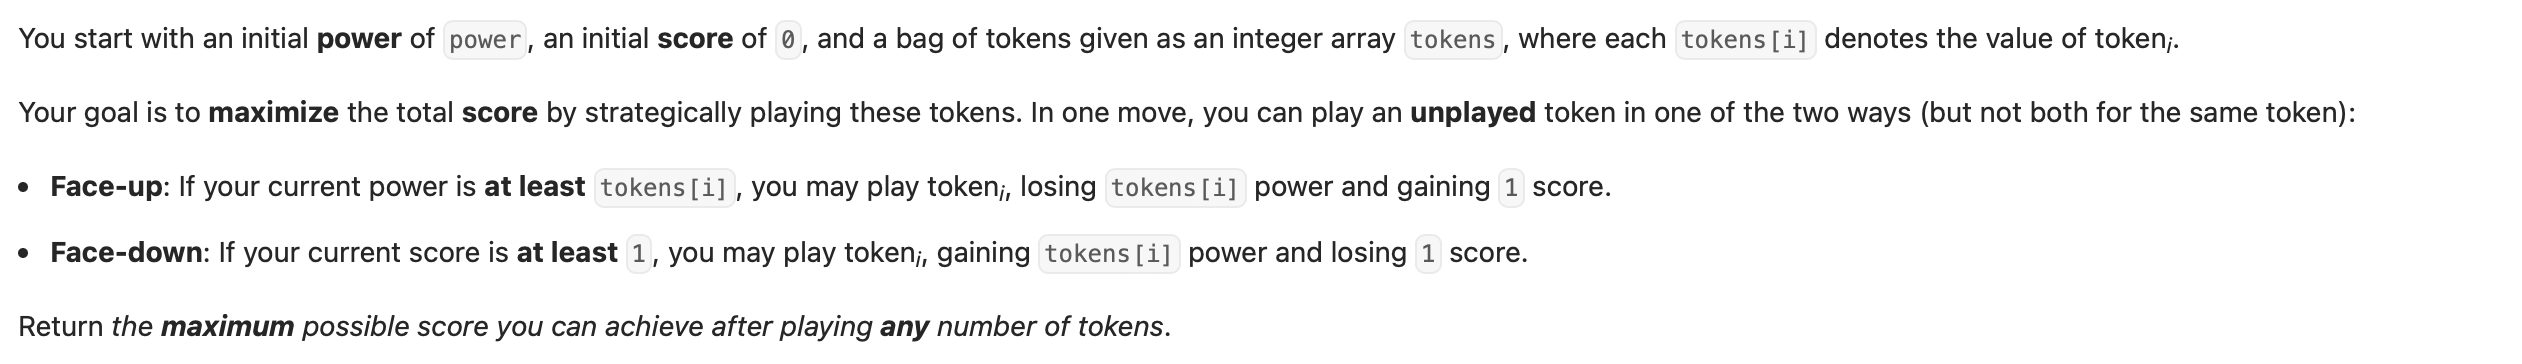

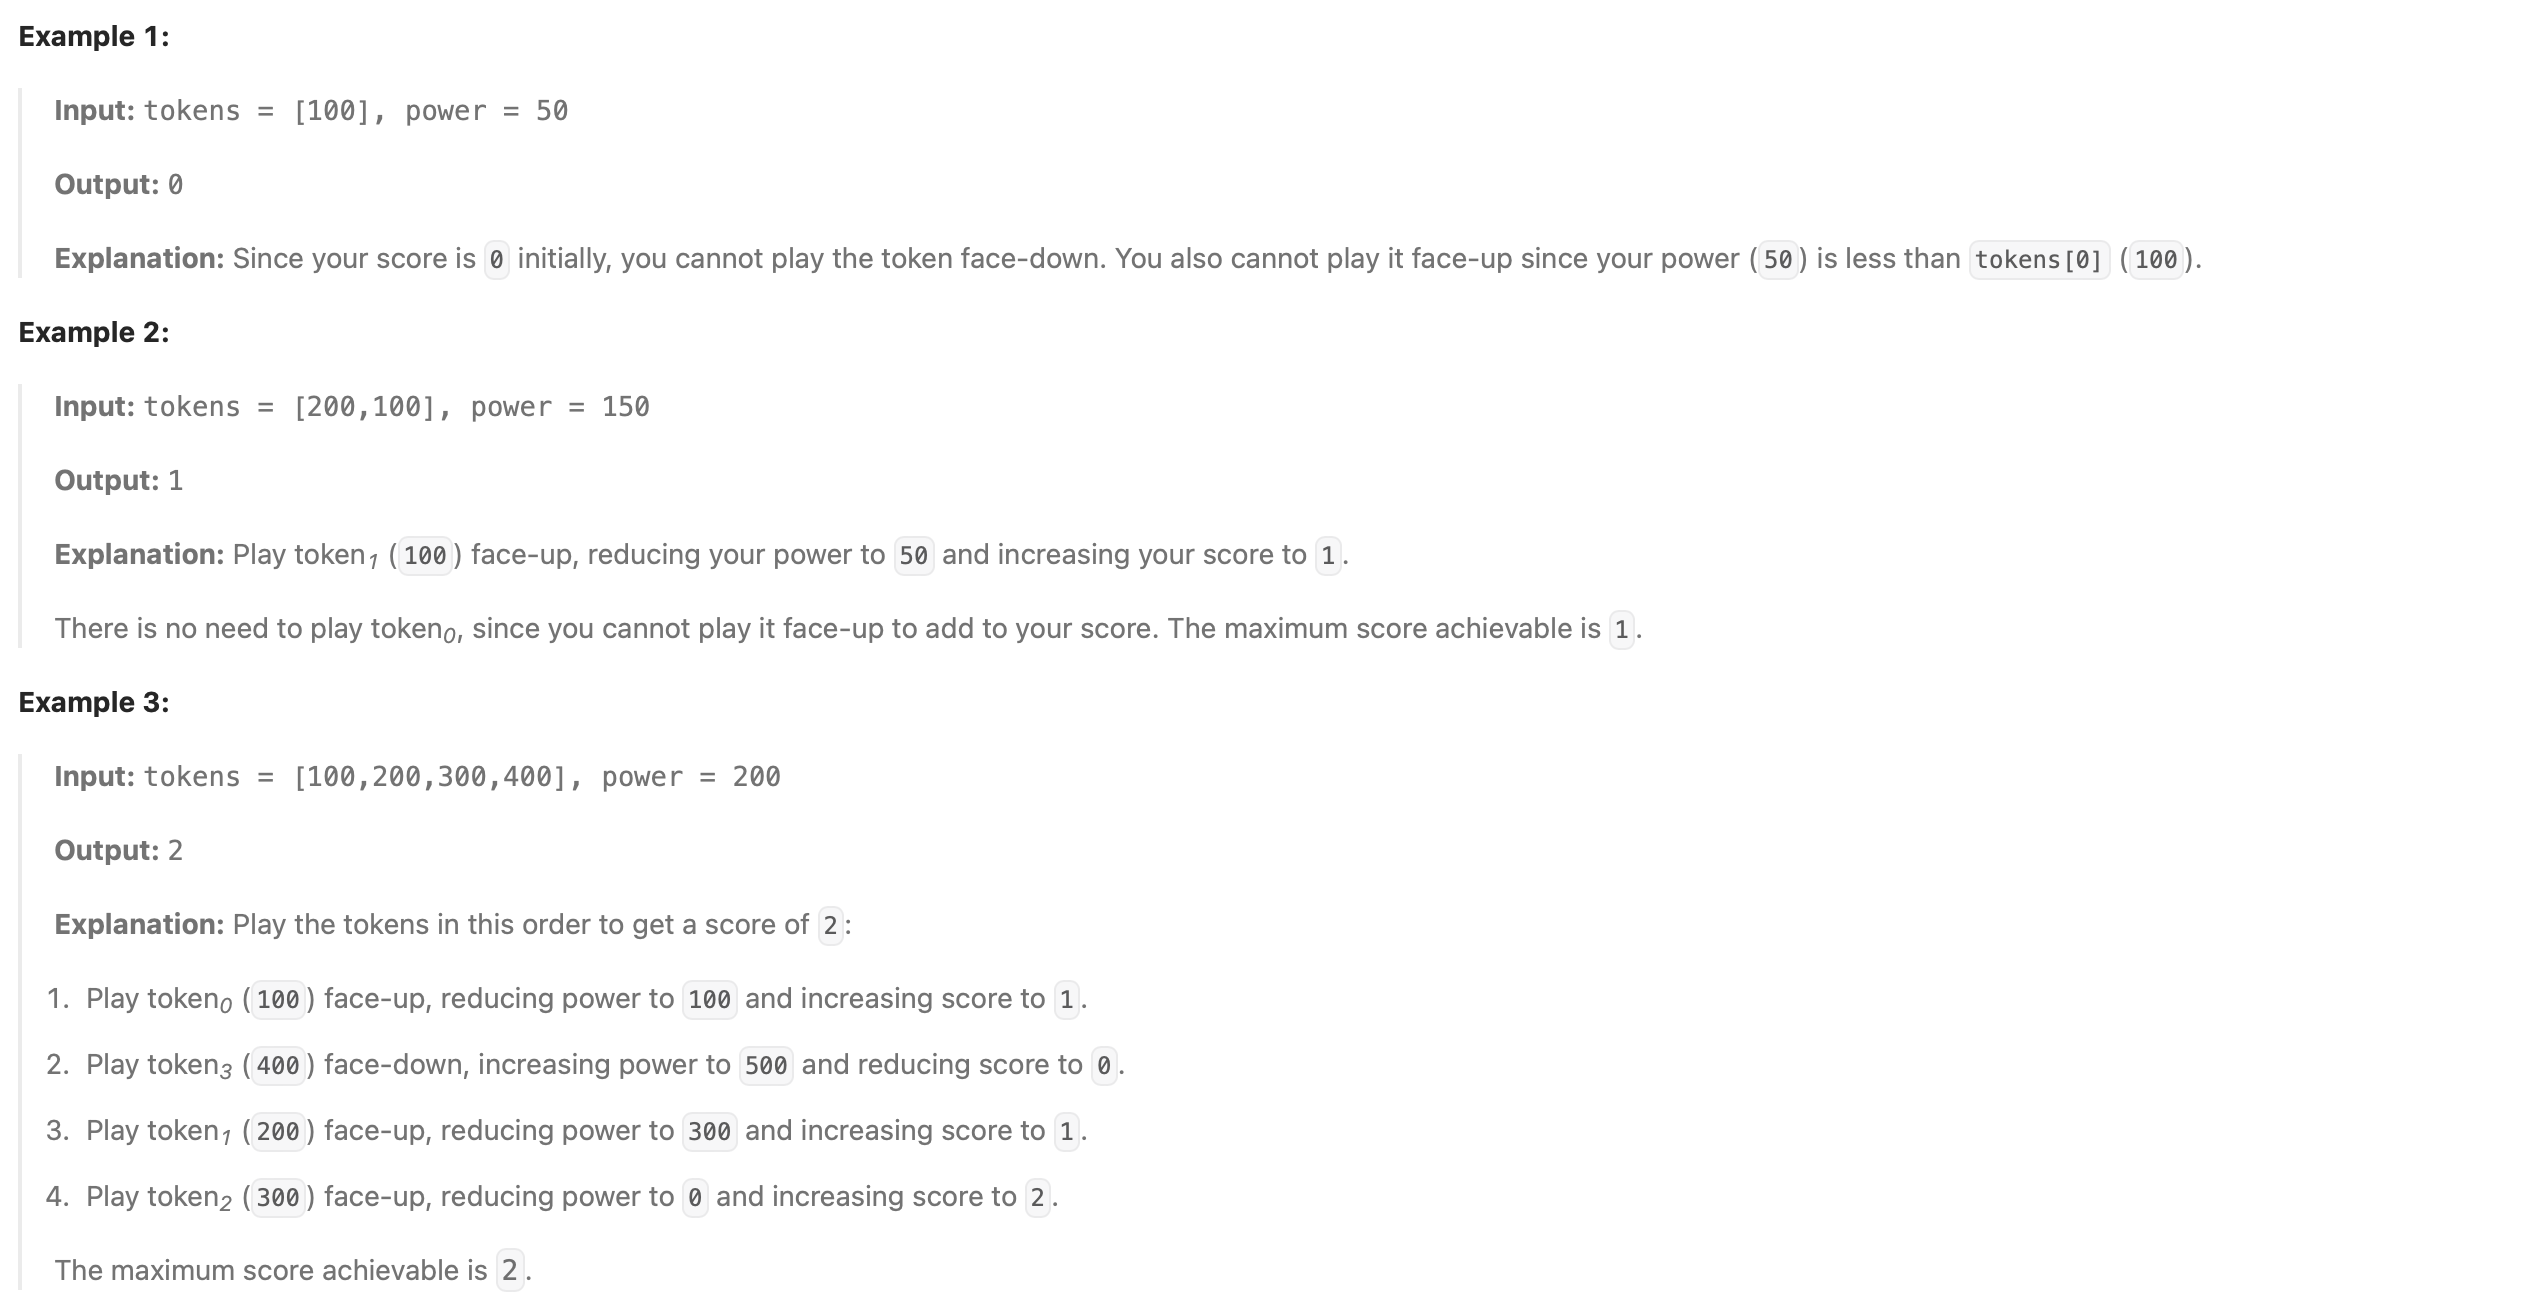

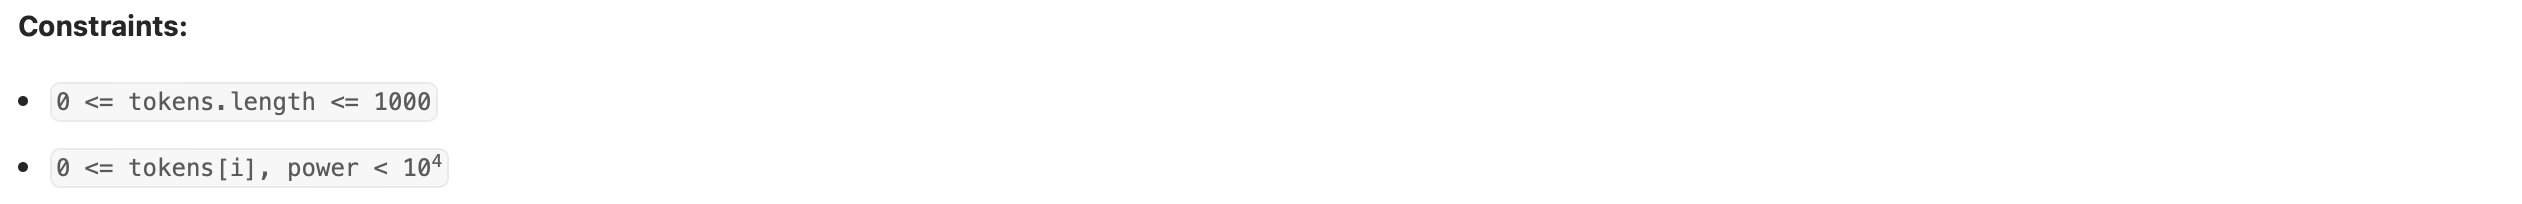

## Approach Overview:

Our approach here is actually pretty simple, to **maximize** score we need to **maximize** `power`. And to achieve this we need to do only two things. 

1. When it's time to play a token **face up** (trading current `power` for `score`), we need to trade / lose as little `power` as possible.  

2. When it's time to play a token **face down** (trading `score` for `power`), we need to trade / gain as much `power` as possible. 

We iterate through all the tokens in `tokens` and store the biggest `score` we can achieve using this strategy. Oh and we use two pointers to facilitate this process.

## Detailed Explanation:

The key to this problem involves figuring out the correct *strategy* and that is, to **maximize** score we need to **MAXIMIZE** `power`.

There are only one of three things we can do in a move.

1. If we have enough `power` (to increase `score`), then play **face up** (i.e. lose `power` to gain `score`) to maximize `score` (i.e. make it as big as possible). To best way to do this, we need to trade / lose as little `power` as possible.   

2. If we don't have enough `power` (to increase `score`), then play **face down** (i.e. lose `score` to gain / top-up `power`). The best way to do this is to trade / lose `score` for as large as `power` possible (so we can in future maximize / make `score` as big as possible).

**Edge case: if don't have enough power (to increase score) and our current score = 0, then we can't play face down or face up, we can't do anything, so we have to stop playing and return 0 (current score).**

Inorder to make this strategy algorimthically feasible we need to sort the `tokens` array in ascending order. If we don't do this it's going to be difficult to **maximize** or **minimize** power at any given turn / move.

Well technically, it is feasible to implement this *score maximizing* strategy without sorting `tokens`. We basically only need to pick either the lowest valued or highest valued **token** available at any given turn / move. 

BUT if do that then we'll have to play the same token many times, and to avoid this "token repeat" we'd need to **delete** the token from the `tokens` array after we play it. If we do that then we can implement the strategy, but this is not optimal. 


## Key Challenges:

1. Coming up with this simple yet brilliant winning strategy. 

## Solution:

In [ ]:
class Solution:
    def bagOfTokensScore(self, tokens: List[int], power: int) -> int:
        # sort the tokens array
        tokens = sorted(tokens)

        # initialize variable to store current score
        score = 0

        # initialize variable to store maximum possible score 
        maxScore = 0

        # initialize left pointer to track position of lowest valued token
        # initialize right pointer to track position of highest valued token
        left, right = 0, len(tokens) - 1 

        # continue until the two pointer crosses / exceeds each other
        while left <= right:
            
            # check if our current power is more than or equal to the lowest valued token
            if power >= tokens[left]:
                # decrease power by tokens[left]
                power -= tokens[left]
                # increment score by 1
                score += 1
                # update maxScore with the largest score seen so far
                maxScore = max(maxScore, score)
                # increment left pointer
                left += 1

            # check if score is greater than 0
            elif score > 0:
                # decrement score by 1
                score -= 1    
                # increase power by tokens[right]
                power += tokens[right]
                # decrement right pointer 
                right -= 1
        
            # otherwise
            else:
                # break loop 
                break
        # return maximum possible score we can achieve
        return maxScore        